In [1]:
#!pip install pycocotools, shapely
import sys
sys.path.append('../../coco-helper/src')

In [2]:
from cocohelper import COCOHelper
from cocohelper.validator import COCOValidator
from cocohelper.stats import COCOStats
from cocohelper.visualizer import COCOVisualizer
from cocohelper.splitters.proportional import ProportionalDataSplitter
from cocohelper.splitters.kfold import KFoldSplitter
from cocohelper.splitters.stratified import StratifiedDataSplitter

## Dataset download
For this tutorial, we'll be using data and annotations obtained from the [COCO Dataset](http://www.cocodataset.org). However, to make dataset download and the snippets run faster, we created a smaller version of the dataset, named `microCOCO`, that only contains a small subset of images and annotations from the entire COCO dataset.\
We left image names and ids unchanged so that you can easily find these images in the originary dataset.

In [3]:
# download the dataset
# !wget https://github.com/AILAB-bh/coco-helper/tree/master/data/tutorial_material/micro_coco.zip -O ./data/micro_coco.zip
#!unzip -o ./data/micro_coco.zip
    
root = "./micro_coco"
annotations_file = f"{root}/annotations/annotations.json"
image_dir = "images"  # this is the image dir relative path, expected to be under the same root when using COCOHelper.load_json()

However, if you still prefer running this tutorial on the source COCO dataset (download available [here](https://cocodataset.org/#download)), you can do it by downloading it with the following lines, which we commented out.

In [4]:
# download the dataset
# !wget http://images.cocodataset.org/zips/train2014.zip -O ./data/coco_train2014.zip
# !unzip ./data/coco_train2014.zip -d ./data/coco_train2014
# !wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip -O ./data/annotations_trainval2014.zip
# !unzip ./data/annotations_trainval2014.zip

# root = "./coco_train2014"
# dataset_name = f"{root}/annotations/annotations.json"
# image_dir = "images"  # this is the image dir relative path, expected to be under the same root when using COCOHelper.load_json()

## Dataset loading and validation
First, let's load a COCO dataset and validate it to make sure it is in a valid COCO format.

In [5]:
print(f"Loading dataset: {annotations_file}")
ch = COCOHelper.load_json(annotations_file, img_dir=image_dir)

Loading dataset: ./micro_coco/annotations/annotations.json


## Extracting data statistics
Below, we show examples of useful data statistics that we can extract using COCO helper.

In [6]:
print("Create COCOStats object to extract statistics on the dataset items")
stats = COCOStats(ch)

Create COCOStats object to extract statistics on the dataset items


In [7]:
size_stats = stats.get_image_size_stats()
print(f"These are the statistics of the image size in this dataset:")
size_stats

These are the statistics of the image size in this dataset:


{'min': [240, 320],
 'max': [640, 640],
 'mean': [485.9512195121951, 550.6829268292682],
 'median': [480.0, 640.0],
 'std': [109.79247635592543, 103.72511491728704],
 'mode': [640, 640],
 'iqr': [215.0, 160.0],
 'skewness': [0.12224889824218133, -0.6123248949135229],
 'kurtosis': [-0.9231923151048282, -1.0024103858781417],
 'avg_size_ratio': 0.9290851572800106}

In [8]:
print("Compute the minimum image size that guarantees that images resampled to that resolution do not lose labels.")
for m in ["median", "mode", "mean"]:
    optimal_image_size = stats.get_optimal_image_size(mode=m, n_pixels=4)
    print(f" - Optimal image size based on {m}: {optimal_image_size}")

Compute the minimum image size that guarantees that images resampled to that resolution do not lose labels.
 - Optimal image size based on median: (480, 648)
 - Optimal image size based on mode: (640, 648)
 - Optimal image size based on mean: (485, 648)


In [9]:
print("Categories have the following ratios in the dataset:")
print(" - Grouped by category name:")
cat_nms_ratios = stats.cat_nms_ratios
cat_nms_ratios

Categories have the following ratios in the dataset:
 - Grouped by category name:


{'person': 0.3536977491961415,
 'bottle': 0.06109324758842444,
 'chair': 0.04501607717041801,
 'sheep': 0.04180064308681672,
 'zebra': 0.04180064308681672,
 'car': 0.03858520900321544,
 'handbag': 0.03536977491961415,
 'donut': 0.03536977491961415,
 'bowl': 0.02572347266881029,
 'boat': 0.022508038585209004,
 'giraffe': 0.01929260450160772,
 'traffic light': 0.01929260450160772,
 'train': 0.01929260450160772,
 'umbrella': 0.01607717041800643,
 'baseball bat': 0.012861736334405145,
 'carrot': 0.012861736334405145,
 'book': 0.012861736334405145,
 'broccoli': 0.00964630225080386,
 'bench': 0.00964630225080386,
 'skis': 0.00964630225080386,
 'skateboard': 0.00964630225080386,
 'cake': 0.00964630225080386,
 'dining table': 0.00964630225080386,
 'suitcase': 0.00964630225080386,
 'truck': 0.00964630225080386,
 'sink': 0.006430868167202572,
 'clock': 0.006430868167202572,
 'oven': 0.006430868167202572,
 'potted plant': 0.006430868167202572,
 'backpack': 0.006430868167202572,
 'kite': 0.0064308

In [10]:
print(" - Grouped by category id:")
cat_ids_ratios = stats.cat_ids_ratios
cat_ids_ratios

 - Grouped by category id:


{1.0: 0.3536977491961415,
 44.0: 0.06109324758842444,
 62.0: 0.04501607717041801,
 20.0: 0.04180064308681672,
 24.0: 0.04180064308681672,
 3.0: 0.03858520900321544,
 31.0: 0.03536977491961415,
 60.0: 0.03536977491961415,
 51.0: 0.02572347266881029,
 9.0: 0.022508038585209004,
 25.0: 0.01929260450160772,
 10.0: 0.01929260450160772,
 7.0: 0.01929260450160772,
 28.0: 0.01607717041800643,
 39.0: 0.012861736334405145,
 57.0: 0.012861736334405145,
 84.0: 0.012861736334405145,
 56.0: 0.00964630225080386,
 15.0: 0.00964630225080386,
 35.0: 0.00964630225080386,
 41.0: 0.00964630225080386,
 61.0: 0.00964630225080386,
 67.0: 0.00964630225080386,
 33.0: 0.00964630225080386,
 8.0: 0.00964630225080386,
 81.0: 0.006430868167202572,
 85.0: 0.006430868167202572,
 79.0: 0.006430868167202572,
 64.0: 0.006430868167202572,
 27.0: 0.006430868167202572,
 38.0: 0.006430868167202572,
 50.0: 0.006430868167202572,
 63.0: 0.006430868167202572,
 77.0: 0.006430868167202572,
 49.0: 0.006430868167202572,
 40.0: 0.003

In [11]:
print('Number of images:', stats.nb_imgs)
print('Number of annotations:', stats.nb_anns)
print('Number of categories:', stats.nb_cats)

Number of images: 41
Number of annotations: 310
Number of categories: 80


## Visualizing data samples
Let us visualize a couple of images from the dataset

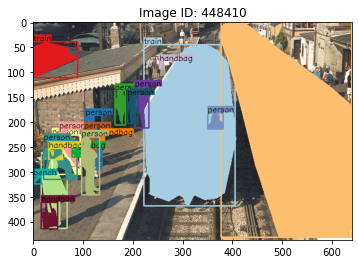

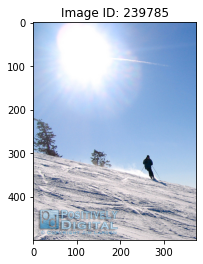

In [12]:
# get the list of image ids:
img_ids = list(ch.imgs.index)

# visualize the ids at the first two positions:
visualizer = COCOVisualizer(ch)
visualizer.visualize(img_id=img_ids[0], show_bbox=True, show_segmentation=True)
visualizer.visualize(img_id=img_ids[1], show_bbox=False, show_segmentation=False)

Sometimes customizing your plot can help visualization:

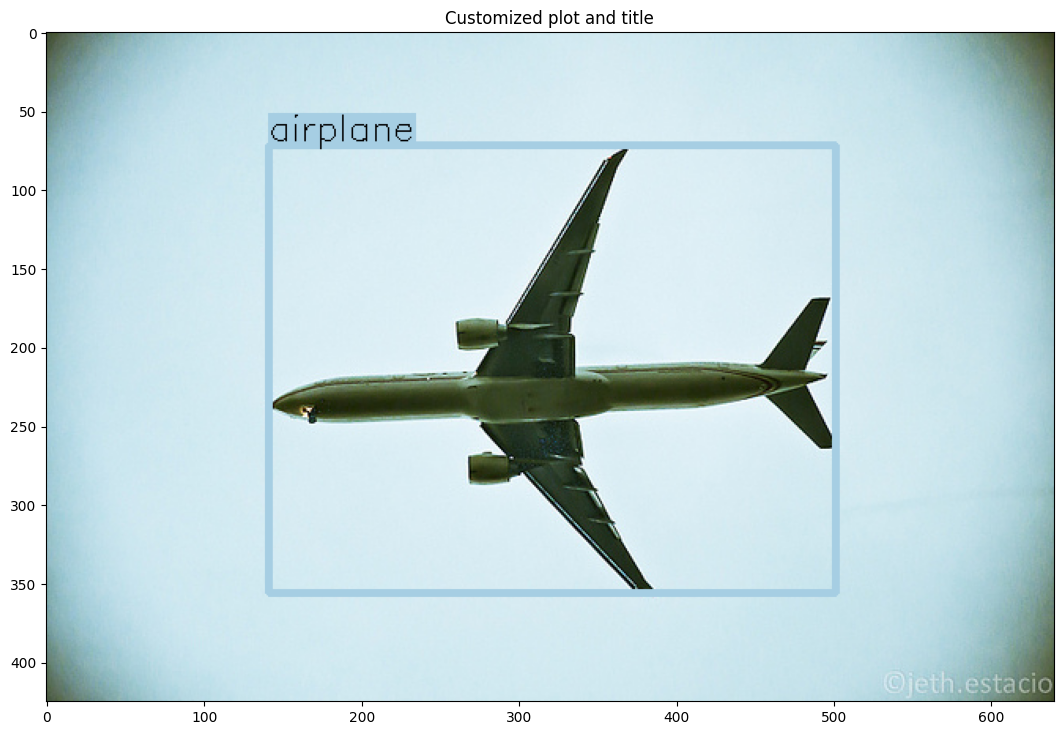

In [13]:
iid = img_ids[4]
visualizer.visualize(
        # image to plot:
        img_id=iid,

        # figure specs:
        figsize=(13, 20),
        dpi=100,
        tight_layout=True,
        title="Customized plot and title",

        # annotation specs:
        show_segmentation=False,
        show_bbox=True,
        bbox_thickness=3
    )

## Splitting the dataset into smaller subsets
Here, we show how to split a dataset in multiple subportions. This can be useful to split an existing dataset for k-fold cross-validation, or to obtain separate subsets for training, validation, and test.

In [14]:
splitter = ProportionalDataSplitter(70, 10, 20)
ch_train, ch_val, ch_test = splitter.apply(ch)

n_tot = stats.nb_imgs
print(f"Total number of images: {n_tot}")
print("Obtained dataset splits have the following number of images (expect slighlty different ratios than those provided):")
for k, n in enumerate([len(ch_train.imgs), len(ch_val.imgs), len(ch_test.imgs)]):
    print(f" - Number of images for set {k} = {n} (i.e. {n*100.0/n_tot:.2f}%)")

Total number of images: 41
Obtained dataset splits have the following number of images (expect slighlty different ratios than those provided):
 - Number of images for set 0 = 29 (i.e. 70.73%)
 - Number of images for set 1 = 4 (i.e. 9.76%)
 - Number of images for set 2 = 8 (i.e. 19.51%)


## Filtering images based on their annotations
Below, we show how to filter images in a COCO dataset based on their annotations

In [15]:
ch.filtered_imgs(cat_ids=1)

,license,file_name,coco_url,height,width,date_captured,flickr_url
image_id,,,,,,,
32577,1,COCO_val2014_000000032577.jpg,http://images.cocodataset.org/val2014/COCO_val...,375,500,2013-11-23 03:24:55,http://farm4.staticflickr.com/3642/3497605242_...
61414,1,COCO_val2014_000000061414.jpg,http://images.cocodataset.org/val2014/COCO_val...,640,426,2013-11-24 07:49:58,http://farm1.staticflickr.com/43/103015569_2b4...
78803,5,COCO_val2014_000000078803.jpg,http://images.cocodataset.org/val2014/COCO_val...,640,425,2013-11-18 09:24:31,http://farm9.staticflickr.com/8306/7826931242_...
80304,4,COCO_val2014_000000080304.jpg,http://images.cocodataset.org/val2014/COCO_val...,480,640,2013-11-15 14:40:06,http://farm5.staticflickr.com/4145/4987470960_...
94531,1,COCO_val2014_000000094531.jpg,http://images.cocodataset.org/val2014/COCO_val...,480,640,2013-11-16 23:20:49,http://farm4.staticflickr.com/3630/3296741788_...
112769,5,COCO_val2014_000000112769.jpg,http://images.cocodataset.org/val2014/COCO_val...,424,640,2013-11-19 21:58:10,http://farm9.staticflickr.com/8285/7774176598_...
119513,1,COCO_val2014_000000119513.jpg,http://images.cocodataset.org/val2014/COCO_val...,464,640,2013-11-20 11:29:02,http://farm4.staticflickr.com/3255/2795510558_...
172648,3,COCO_val2014_000000172648.jpg,http://images.cocodataset.org/val2014/COCO_val...,480,640,2013-11-17 21:10:02,http://farm7.staticflickr.com/6050/6850196156_...
178715,5,COCO_val2014_000000178715.jpg,http://images.cocodataset.org/val2014/COCO_val...,640,426,2013-11-24 09:40:06,http://farm1.staticflickr.com/26/102242537_0ef...


In [16]:
n_tot_images = len(ch.joins.imgs_anns_cats)

for CAT_ID in range(stats.nb_cats):
    filtered_ch = ch.filter_imgs(cat_ids=CAT_ID)
    n_images = len(filtered_ch.imgs)
    print(f"Filtered images having at least one label with category id '{CAT_ID}': " \
          f"{n_images} (i.e. {n_images / n_tot_images * 100:.2f}% of the total)")

Filtered images having at least one label with category id '0': 0 (i.e. 0.00% of the total)
Filtered images having at least one label with category id '1': 23 (i.e. 7.40% of the total)
Filtered images having at least one label with category id '2': 1 (i.e. 0.32% of the total)
Filtered images having at least one label with category id '3': 6 (i.e. 1.93% of the total)
Filtered images having at least one label with category id '4': 1 (i.e. 0.32% of the total)
Filtered images having at least one label with category id '5': 1 (i.e. 0.32% of the total)
Filtered images having at least one label with category id '6': 1 (i.e. 0.32% of the total)
Filtered images having at least one label with category id '7': 3 (i.e. 0.96% of the total)
Filtered images having at least one label with category id '8': 3 (i.e. 0.96% of the total)
Filtered images having at least one label with category id '9': 3 (i.e. 0.96% of the total)
Filtered images having at least one label with category id '10': 3 (i.e. 0.96% 

## Remove specific images from a dataset
Sometimes, it is helpful to remove specific images from a dataset. For example, imagine you have a list of images with weird artifacts and want to remove them. Then, you can create a new COCO dataset from source one by removing said images. In practice, you can obtain the filtered dataset by reversing the way standard filters work! This means that the filter will not give you back images with the required specifics anymore; on the contrary, it will give you images that do not satisfy those specifics

In [17]:
to_remove = [160529, 4497, 440617, 541158]  # list of image ids to remove
filtered_ch = ch.filter_imgs(img_ids=to_remove, invert=True)  # use invert=True to invert the filter behavior
filtered_ch.imgs  # compare with what you obtain using reverse=False!

,license,file_name,coco_url,height,width,date_captured,flickr_url
image_id,,,,,,,
448410,3,COCO_val2014_000000448410.jpg,http://images.cocodataset.org/val2014/COCO_val...,437,640,2013-11-17 09:45:46,http://farm6.staticflickr.com/5338/8858798617_...
239785,1,COCO_val2014_000000239785.jpg,http://images.cocodataset.org/val2014/COCO_val...,500,375,2013-11-20 07:52:10,http://farm4.staticflickr.com/3619/3327998782_...
119513,1,COCO_val2014_000000119513.jpg,http://images.cocodataset.org/val2014/COCO_val...,464,640,2013-11-20 11:29:02,http://farm4.staticflickr.com/3255/2795510558_...
178715,5,COCO_val2014_000000178715.jpg,http://images.cocodataset.org/val2014/COCO_val...,640,426,2013-11-24 09:40:06,http://farm1.staticflickr.com/26/102242537_0ef...
228071,5,COCO_val2014_000000228071.jpg,http://images.cocodataset.org/val2014/COCO_val...,480,640,2013-11-18 21:24:07,http://farm1.staticflickr.com/145/432660385_84...
243148,3,COCO_val2014_000000243148.jpg,http://images.cocodataset.org/val2014/COCO_val...,360,640,2013-11-20 07:13:31,http://farm4.staticflickr.com/3607/3401441595_...
458632,3,COCO_val2014_000000458632.jpg,http://images.cocodataset.org/val2014/COCO_val...,640,427,2013-11-22 22:37:26,http://farm4.staticflickr.com/3339/3587038513_...
32688,3,COCO_val2014_000000032688.jpg,http://images.cocodataset.org/val2014/COCO_val...,426,640,2013-11-16 15:36:02,http://farm1.staticflickr.com/157/353715159_53...
335119,3,COCO_val2014_000000335119.jpg,http://images.cocodataset.org/val2014/COCO_val...,334,500,2013-11-16 16:30:18,http://farm4.staticflickr.com/3344/3485323156_...


Let us see another example...

Say you want to remove the data contained in dataset `B` from your dataset `A`. You can use filters again! Just filter using the image filenames and remove all the images and annotations in `A`.
For this example, let us first create a temporary file from `ch_test` that we created before and then create a dataset of training and validation data together.\
For the sake of this example, rather than joining `ch_train` and `ch_val`, we will remove `ch_test` from the entire dataset!

In [18]:
# let us remove the test data from the entire COCO dataset to obtain all the data minus the test data:
annotations_file = f"{root}/annotations/annotations.json"
chA = COCOHelper.load_json(annotations_file)
chB = ch_test  # you could also load this from the disk, as: chB = COCOHelper.load(test_dataset_name)

# list of test file names that we want to remove:
to_remove = chB.imgs["file_name"].values.tolist()
chC = chA.filter_imgs(img_nms=to_remove, invert=True)  # use invert=True to invert the way the filter works

# the obtained dataset should have no overlap with chA:
assert len(chC.imgs) == len(chA.imgs) - len(chB.imgs)

Now, the resulting dataset `chC` contains all the original data of `chA` minus those data and annotations contained in `chB`.\
Once obtained the filtered dataset, we can save it to the disk. We will use a temporary directory for this example:

In [19]:
import tempfile
import logging
logging.basicConfig(level=logging.DEBUG)


def _validate_generated_dataset(_ch):
    """ Make sure the generated dataset is valid """
    
    validator = COCOValidator(_ch)
    
    # Expect this dataset to have an invalid COCO structure since we save it under a temporary dir instead of root dir
    # validator._has_valid_dataset_tree() --> fails
    
    # However, all the remaining tests should pass with no exception!
    data = validator.helper.to_json_dataset()
    
    assert validator._json_has_mandatory_keys(data)
    assert validator._categories_have_mandatory_keys(data)
    assert validator._images_have_mandatory_keys(data)
    assert validator._annotations_have_mandatory_keys(data)
    assert validator._category_ids_are_unique(data)
    assert validator._licenses_ids_are_unique(data)
    assert validator._image_ids_are_unique(data)
    assert validator._annotation_ids_are_unique(data)
    assert validator._annotations_have_valid_image_id(data)
    assert validator._annotations_have_valid_category_id(data)
    return True



# create a temporary directory using the context manager
# directory and contents will be removed outside of this with() block
with tempfile.TemporaryDirectory() as tmpdirname:
    # store the new dataset under tmpdirname
    chC_fname = f"{tmpdirname}/tmp_ch4.json"
    chC.write_annotations_file(chC_fname)
    
    # let us now load chC from the disk:
    print(f"Loading dataset from file: '{chC_fname}'")
    loaded_chC = COCOHelper.load_json(chC_fname)
    
    assert len(loaded_chC.imgs) == len(chA.imgs) - len(chB.imgs)
    print(f" - Number of images: {len(loaded_chC.imgs)}\n"\
          f" - Number of annotations: {len(loaded_chC.anns)}\n"\
          f" - Number of categories: {len(loaded_chC.cats)}\n")
    
    # make sure the generated dataset is valid:
    _validate_generated_dataset(loaded_chC)
    

Loading dataset from file: '/tmp/tmpfgm_j5f7/tmp_ch4.json'
 - Number of images: 33
 - Number of annotations: 258
 - Number of categories: 80



In [20]:
# and that's it!
print(
    "Congratulation! you just finished this tutorial!"
)

Congratulation! you just finished this tutorial!


## What's next?

This ends our tutorial :)

Now, improving your skills in COCO Helper is up to you. However, don't forget that our team is here to help you. Moreover, we would love to have you on board for further developments: check our contribution guidelines on the official documentation page.
We look forward to seeing what's to come and wish you good luck in your computer vision journey!